# Module 0, Week 1

Welcome to PyEarth!

**Our goals for today:**
- Go over the syllabus
- Concept map Earth Sciences
- Make a simple map using the `cartopy` package

## Syllabus

https://bcourses.berkeley.edu/courses/1474063/assignments/syllabus
***

## Overview of Earth Sciences and Zooming in on Geophysics

**Why Study the Earth?**

Earth is an ever-changing, complex system of interacting rock, water, air, and life. Humans depend on Earth for resources and are affected by natural-hazards. Earth scientists make observations and conduct experiments to understand Earth's complexities, and use their understanding of past processes to forecast future conditions.

<img src="Figures/Earth_structure.png">

> Source: modified from Gary Hincks/Science Source SS2410099

Earth has four major systems: the geosphere, hydrosphere, atmosphere, and biosphere.

<img src="Figures/Earth_science_spheres_1.png">

Each of these systems forms a branch of Earth Science, made up of many subdisciplines of scientists who use a variety of tools and techniques to study Earth.

<img src="Figures/ES_spheres_detail.png">

Each of the branches of Earth Science is profoundly connected with the others.

<img src="Figures/ES_spheres_map.png">

This semester of EPS88 we will focus on the geosphere, made up of Earth's crust, mantle, and core. Again, this branch of Earth Science is made up of many subdisciplines of scientists who use a variety of tools and techniques to study the Earth. Geoscientists make observations of earth materials, and of the dynamics of Earth's as mass and energy are cycled between systems. Geophysics is a very interdisciplinary science because its subdisciplines have complementary approaches and because Earth's systems are so interconnected.

<img src="Figures/Geosphere_detail.png">

The subject of geophysics encompasses the study of a broad range of Earth phenomena.
<img src="Figures/Geophysics_detail.png">

<img src="Figures/Seismology_1.png">

<img src="Figures/Radioactive_1.png">

<img src="Figures/Heat_flow_1.png">

<img src="Figures/Gravity_1.png">

<img src="Figures/Geomag_1.png">

<img src="Figures/EM_1.png">

<img src="Figures/Min_Phys_1.png">

<img src="Figures/Geodynamics_1.png">

**How do Geoscience and Data Science work together?**

As with many fields of science access to digital instrumentation and high-power computing capabilities are rapidly changing the methods used by geoscientists. The amount of data being collecting is growing, and the systems of equations are growing in number and complexity. An example that we'll look at during this course:

<img src="Figures/comp_seis_1.png">

<img src="Figures/seis_example_1.png">
***

## Introduction to Mapping with Cartopy

Set up:

In [1]:
import  matplotlib.pyplot  as plt
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS

The data we'll be looking at is pretty simple, just the coordinates of my hometown and of Berkeley.

In [2]:
# Latitude and Longitude of my hometown: Pavilion, NY.
HT_lon = -77.966842;
HT_lat = 42.906602;

# Latitude and Longitude of Berkeley,CA.
Berkeley_lon = -122.2727;
Berkeley_lat = 37.8716;

Let's plot a basic world map with a marker on Pavilion, NY.

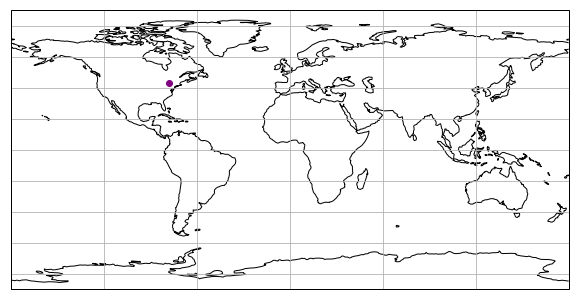

In [3]:
plt.figure(1,(10,10)) # set the figure frame size
ax = plt.axes(projection=ccrs.PlateCarree()) # set the map projection
ax.set_global() # set the extent of the map
map1=plt.scatter(HT_lon,HT_lat,marker='o',color='purple') # plot a purple circle on my hometowm

ax.coastlines() # add coastlines
ax.gridlines() # add gridlines

plt.show() 

Using `ax.add_feature` we can add more details to our map.

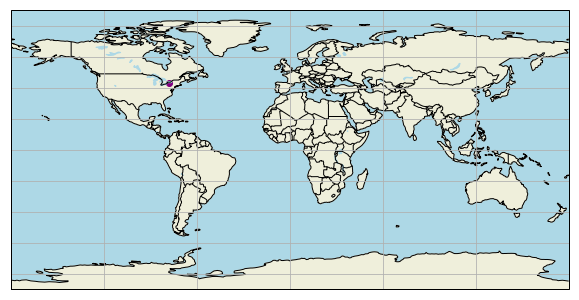

In [4]:
plt.figure(1,(10,10)) # set the figure frame size
ax = plt.axes(projection=ccrs.PlateCarree()) # set the map projection
ax.set_global() # set the extent of the map
map1=plt.scatter(HT_lon,HT_lat,marker='o',color='purple') # plot a purple circle on my hometowm

ax.coastlines() # add coastlines
ax.gridlines() # add gridlines
ax.add_feature(OCEAN,color='lightblue') # color the oceans
ax.add_feature(LAKES,color='lightblue') # color the large lakes
ax.add_feature(LAND) # color the land
ax.add_feature(BORDERS) # add national borders

plt.show() 

We can change center of the map.

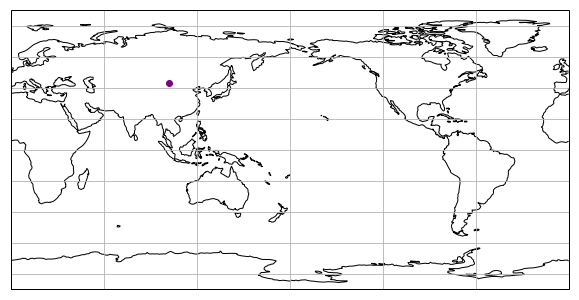

In [5]:
central_lon=180.0

plt.figure(1,(10,10))
ax = plt.axes(projection=ccrs.PlateCarree(central_lon)) # change the central longitude of the map
ax.set_global()

map1=plt.scatter(HT_lon,HT_lat,marker='o',color='purple')

ax.coastlines()
ax.gridlines()

plt.show()

Oh no! My hometown is in the wrong stop! We just shifted the map underneath. To fix it we need to tell `plt.scatter` what projection and center point our data (`HT_lon` and `HT_lat`) are with respect to. Let's also add a more exciting background image with the built in `ax.stock_img()`.

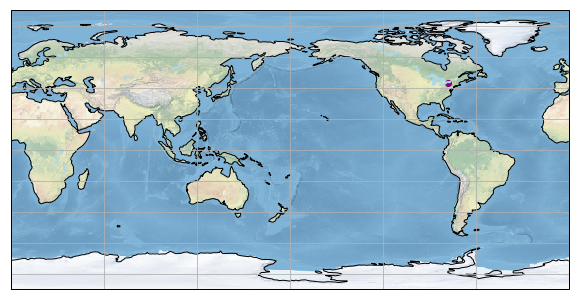

In [6]:
plt.figure(1,(10,10))
ax = plt.axes(projection=ccrs.PlateCarree(180))
ax.set_global()

# tell cartopy the reference frame projection of the marker location with transform=ccrs.PlateCarree()
map1=plt.scatter(HT_lon,HT_lat,marker='o',color='purple', transform=ccrs.PlateCarree()) 

ax.coastlines()
ax.stock_img() # add a stock image from cartopy of Earth as background
ax.add_feature(LAKES,color='lightblue')
ax.gridlines()

plt.show()

We don't have to plot a world map. Let's zoom in!

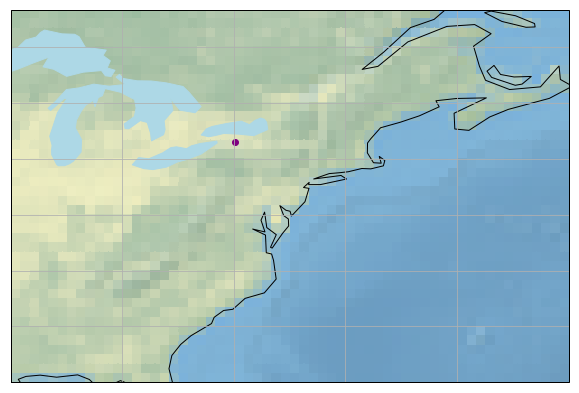

In [7]:
plt.figure(1,(10,10))
ax = plt.axes(projection=ccrs.PlateCarree(HT_lon)) # center map on hometown longitude
ax.set_extent([-90, -60, 50, 30], crs=ccrs.PlateCarree()) # set the extent of the map [left, right, top, bottom]
map1=plt.scatter(HT_lon,HT_lat, marker='o',color='purple', transform=ccrs.PlateCarree())

ax.coastlines()
ax.stock_img()
ax.add_feature(LAKES,color='lightblue')
ax.gridlines()


plt.show()

Now, let's try out some other map projections! A map projection is a mathematical transformation of the latitudes and longitudes from the surface of a sphere into locations on a 2D plane. The Plate Carree projection that we used above is an equirectangular projection. Lines of latitude and longitude are equally spaced and at right angles everywhere. Because latitude and longitude are equally spaced it will be the default reference frame for datasets.

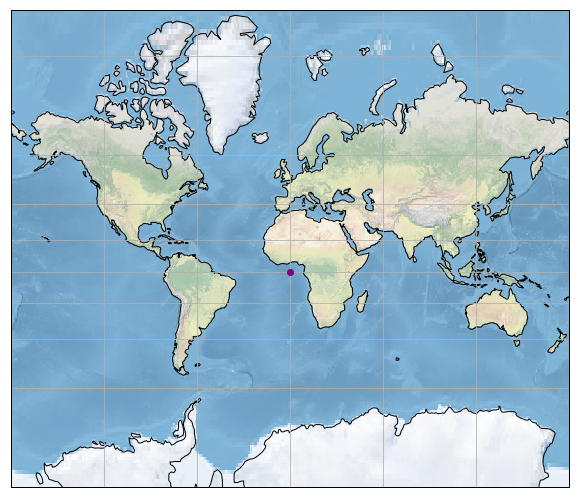

In [8]:
plt.figure(1,(10,10))
ax = plt.axes(projection=ccrs.Mercator()) # Mercator projection centered on zero
ax.set_global()
map1=plt.plot(HT_lon,HT_lat,marker='o',color='purple') 

ax.coastlines()
ax.stock_img()
ax.gridlines()

plt.show()

We still need to tell cartopy the reference frame projection of the marker location with `transform=ccrs.PlateCarree()`.

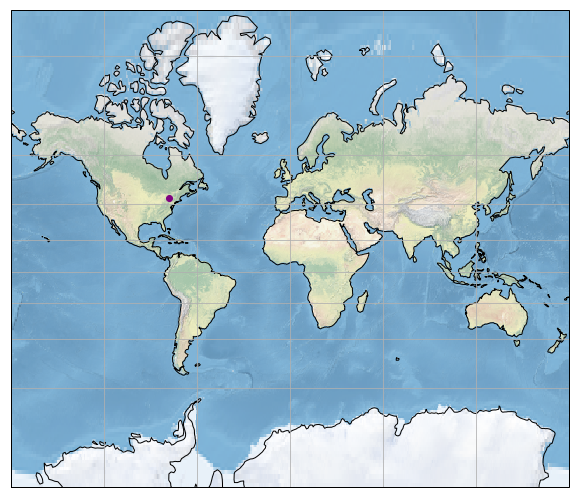

In [14]:
plt.figure(1,(10,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_global()
map1=plt.plot(HT_lon,HT_lat,marker='o',color='purple', transform=ccrs.PlateCarree())

ax.coastlines()
ax.stock_img()
ax.gridlines()

plt.show()

This map looks a lot different, especially at the poles! We can use Tissot’s indicatrix (a bunch of circles at different locations) to characterize local distortions due to our map projection.

/anaconda3/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x10c49b0f8> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


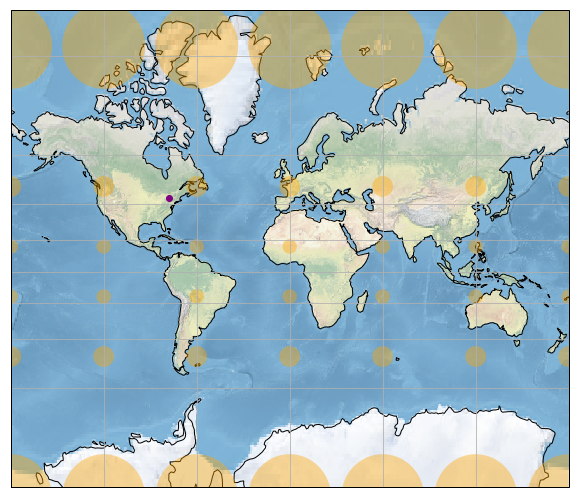

In [10]:
plt.figure(1,(10,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_global()
map1=plt.plot(HT_lon,HT_lat,marker='o',color='purple', transform=ccrs.PlateCarree())

ax.coastlines()
ax.stock_img()
ax.gridlines()

ax.tissot(facecolor='orange', alpha=0.4) # add equal area circles to see how the are distorted

plt.show()

Mercator projections conserve the shapes of objects (conformal). So they are useful for navigation because course angles are correct. Lines of latitude and longitude make right angles. The size of objects is increasingly distorted towards the poles. Just look at Greenland!

/anaconda3/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x10daa5938> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


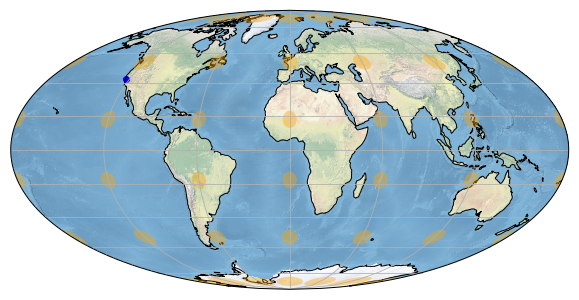

In [11]:
plt.figure(1,(10,10))
ax = plt.axes(projection=ccrs.Mollweide())
ax.set_global()
map1=plt.scatter(Berkeley_lon, Berkeley_lat,marker='o',color='blue', transform=ccrs.PlateCarree())

ax.coastlines()
ax.stock_img()
ax.gridlines()

ax.tissot(facecolor='orange', alpha=0.4)

plt.show()

Mollweide projects maintain the size of objects (equal-area), but at the expense of distortions in shape. Latitude and longitude only appear to be 90 degrees at the center.

/anaconda3/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x181bdcaaf0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


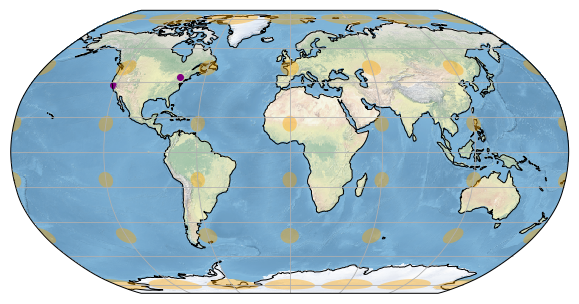

In [12]:
plt.figure(1,(10,10))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
map1=plt.scatter([HT_lon, Berkeley_lon],[HT_lat, Berkeley_lat],marker='o',color='purple', transform=ccrs.PlateCarree())

ax.coastlines()
ax.stock_img()
ax.gridlines()

ax.tissot(facecolor='orange', alpha=0.4)

plt.show()

Robinson is a compromise projection. Compromise projections give up the idea of preserving the shape or size of objects, and instead try to minimize both distortions. Also notice that we're now passing `plt.scatter` arrays of latitude and longitude.

What is the shortest path between Pavilion, NY and Berkeley, CA?

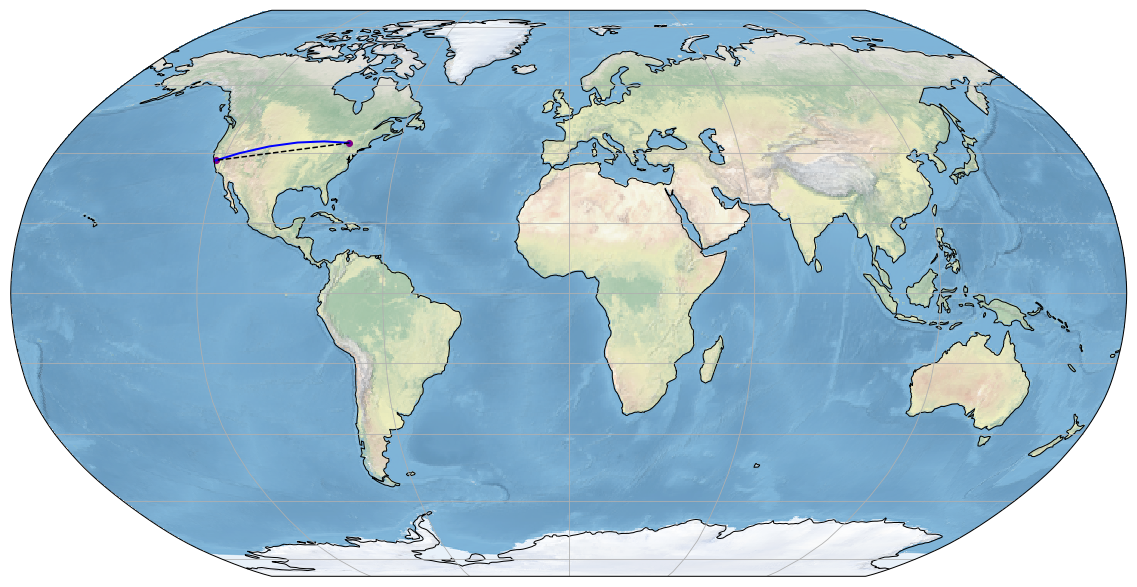

In [21]:
plt.figure(1,(20,20))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
plt.scatter([HT_lon, Berkeley_lon],[HT_lat, Berkeley_lat],marker='o',color='purple', transform=ccrs.PlateCarree())

plt.plot([HT_lon, Berkeley_lon],[HT_lat, Berkeley_lat],
         color='blue', linewidth=2,
         transform=ccrs.Geodetic(),
         )

plt.plot([HT_lon, Berkeley_lon],[HT_lat, Berkeley_lat],
         color='black', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

ax.coastlines()
ax.stock_img()
ax.gridlines()

plt.show()

Notice how the blue line between New York and Berkeley is not straight on a flat map, this is because the Geodetic coordinate system is a truly spherical coordinate system. The blue line is the shortest path between those points on the globe rather than 2D Cartesian space. The black line is the shortest distance in our 2D plane, that's why it is looks straight, but on a spherical globe it would be distored.